### EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy.stats as stats
from scipy.stats import boxcox, skew as stats_skew
import seaborn as sns
import functions as func
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('carclaims.csv')
print(df.shape)
df.head()

(15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [4]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [5]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

### Target

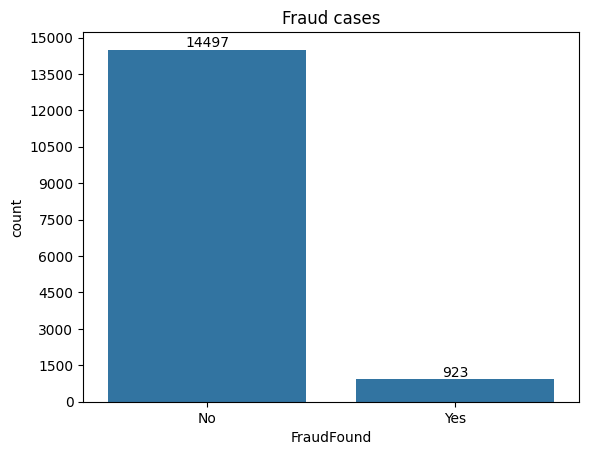

In [3]:
ax = sns.countplot(data=df, x='FraudFound')
ax.bar_label(ax.containers[0])
plt.title('Fraud cases')

plt.yticks(np.arange(0, 16000, 1500))
plt.show()

Need to oversample minority class: "Yes" FraudFound to achieve class balance

### Missing data

In [7]:
missing = [var for var in df.columns if df[var].isnull().sum() > 0]
missing

[]

### Variable Type

#### Numerical

In [4]:
num_var = [var for var in df.columns if df[var].dtype != 'O']
print(len(num_var))
num_var

8


['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

#### Numerical - Discrete

In [5]:
discrete_var = [var for var in num_var if len(df[var].unique()) < 20 and 'Year' not in var]
print(len(discrete_var), 'discrete vars')
df[discrete_var].head()

5 discrete vars


,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating
0,5,1,12,300,1
1,3,4,15,400,4
2,5,2,7,400,3
3,2,1,4,400,2
4,5,2,3,400,1


#### Numerical - Continuous

In [6]:
cont_var = [var for var in num_var if var not in discrete_var]
print(len(cont_var), 'continuous vars')
df[cont_var].head()

3 continuous vars


,Age,PolicyNumber,Year
0,21,1,1994
1,34,2,1994
2,47,3,1994
3,65,4,1994
4,27,5,1994


### Skewness

In [7]:
skew = df[num_var].skew().sort_values(ascending=False)
skew

Deductible            6.078803
Year                  0.245689
WeekOfMonthClaimed    0.158233
Age                   0.152314
WeekOfMonth           0.115426
DriverRating          0.009283
RepNumber             0.006628
PolicyNumber          0.000000
dtype: float64

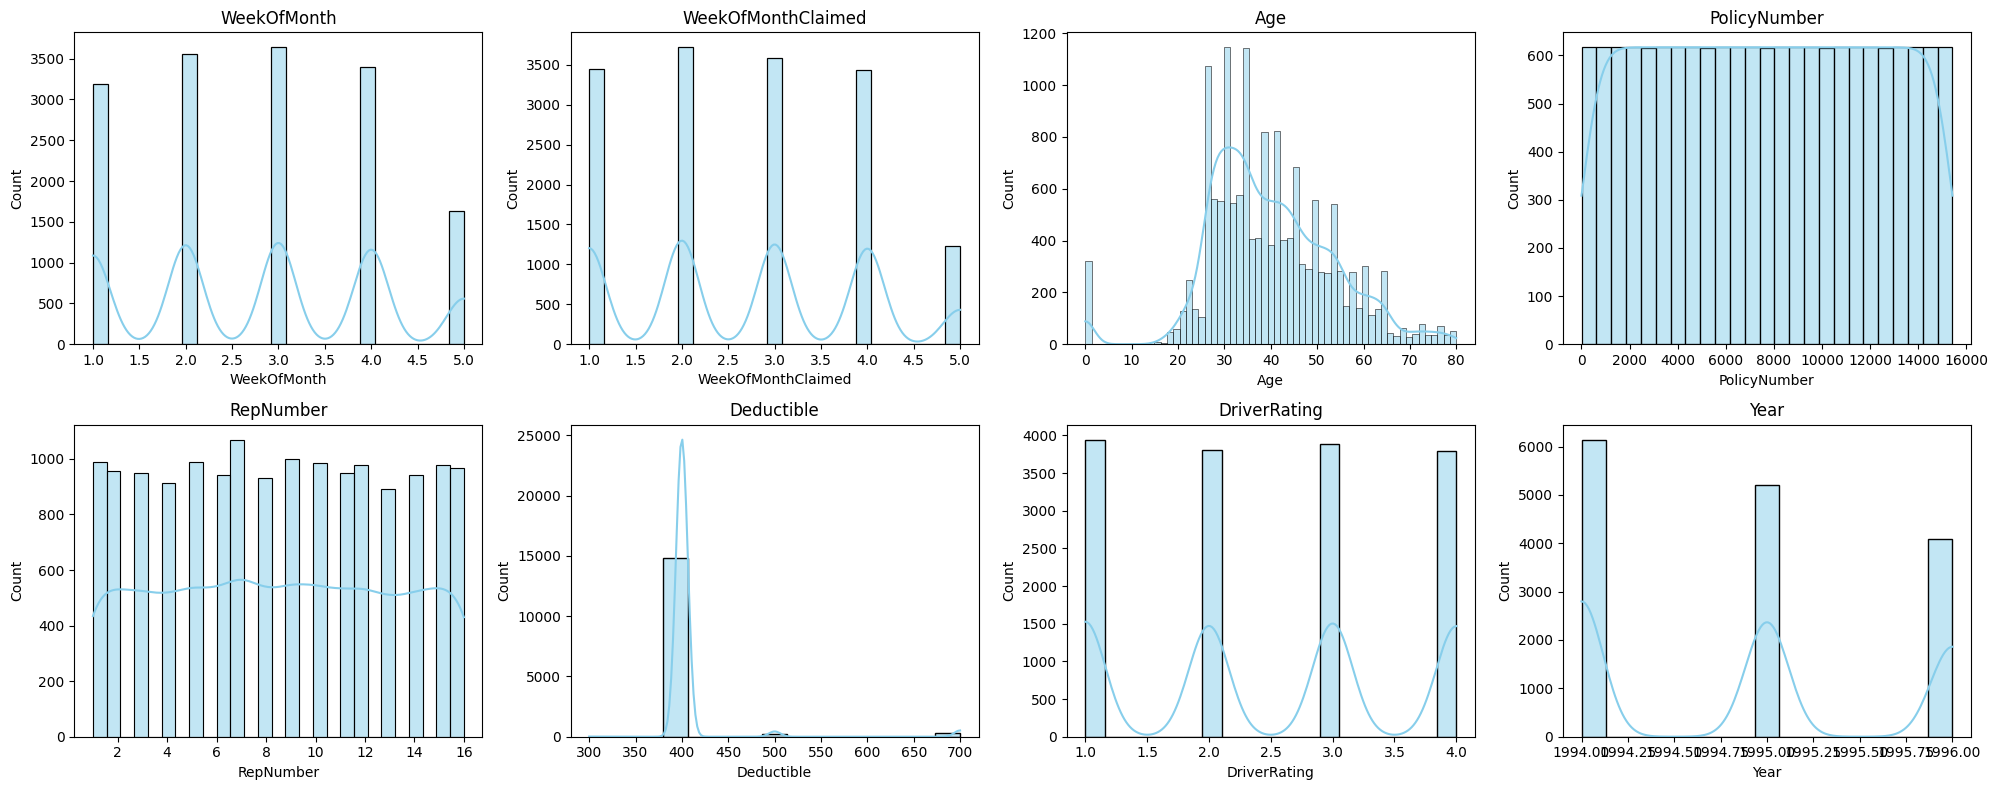

In [12]:
func.histograms(df, num_var, n_cols=4)

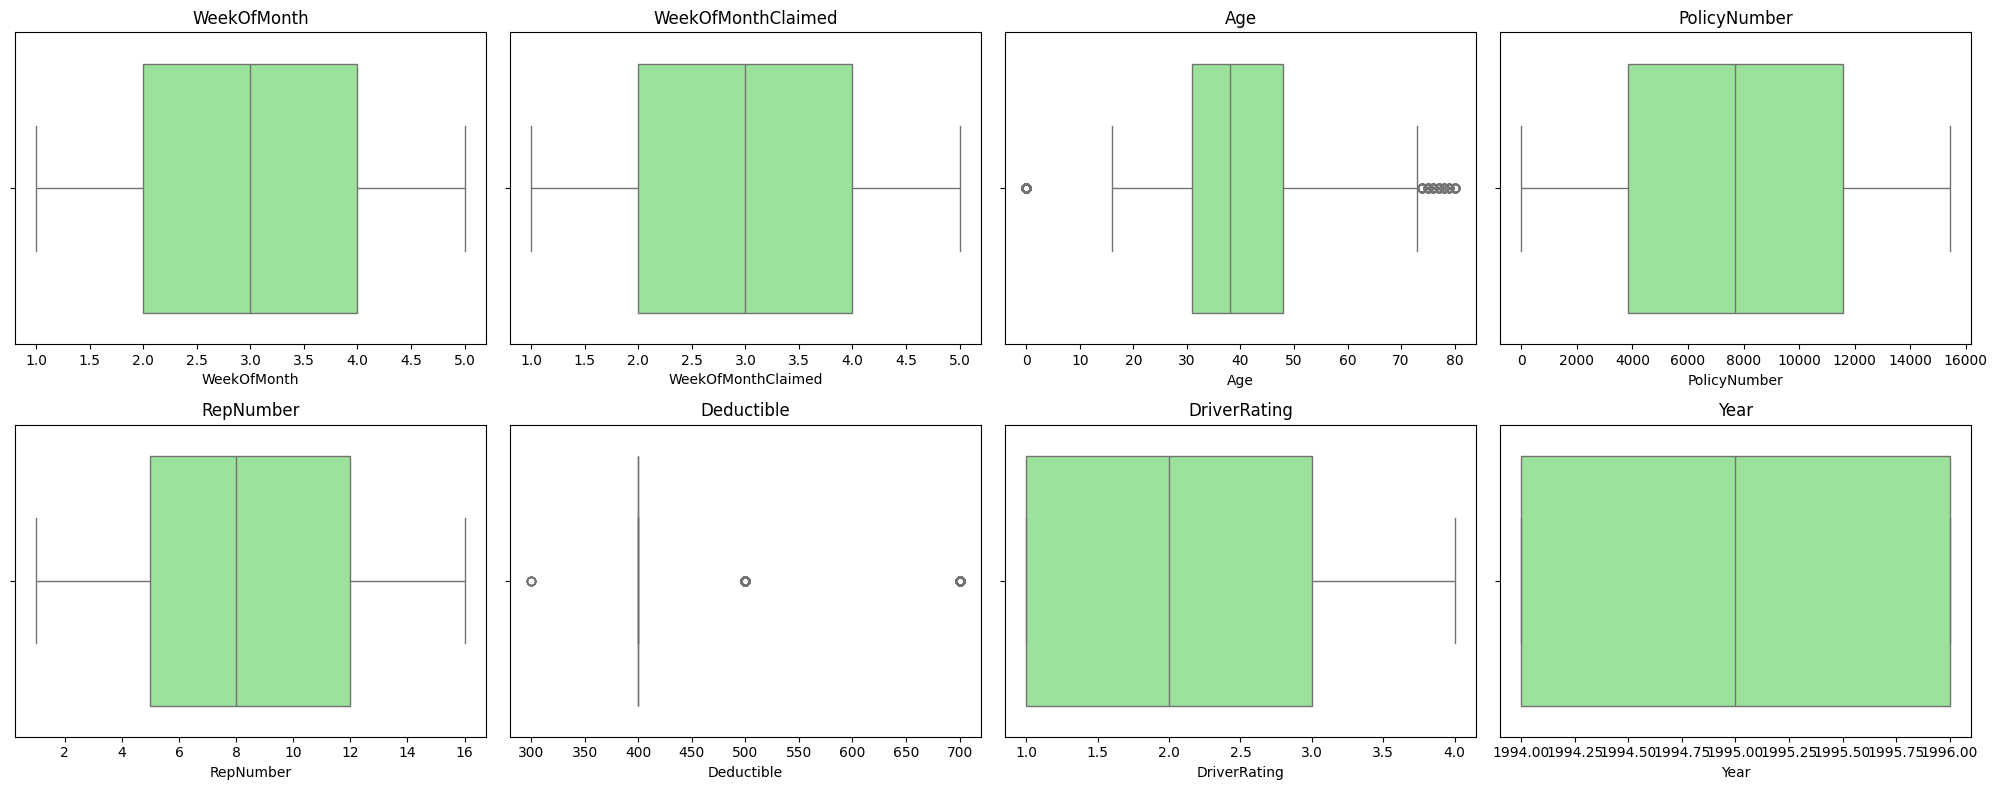

In [13]:
func.box_plot(df, num_var, n_cols=4)

In [8]:
from sklearn.preprocessing import PowerTransformer
powerTransform = PowerTransformer(method='yeo-johnson')

In [9]:
age = df['Age']
age_nonzero_median = df[df['Age'] > 0]['Age'].median()
age = age.replace(0, age_nonzero_median)

log_trans = np.log(age)
sqrt_trans = np.sqrt(age)
boxcox_trans, _ = boxcox(age)
yeojohnson = powerTransform.fit_transform(age.values.reshape(-1, 1)).flatten()

print('Skewness before transformation:', df['Age'].skew())
print(f'log: {log_trans.skew()}')
print('square root:', sqrt_trans.skew())
print('Box-Cox:', stats_skew(boxcox_trans))
print('Yeo-Johnson:', stats_skew(yeojohnson))

Skewness before transformation: 0.15231404727082648
log: 0.09211947359159138
square root: 0.414214123860745
Box-Cox: 0.006318630060989713
Yeo-Johnson: 0.007620250640807705


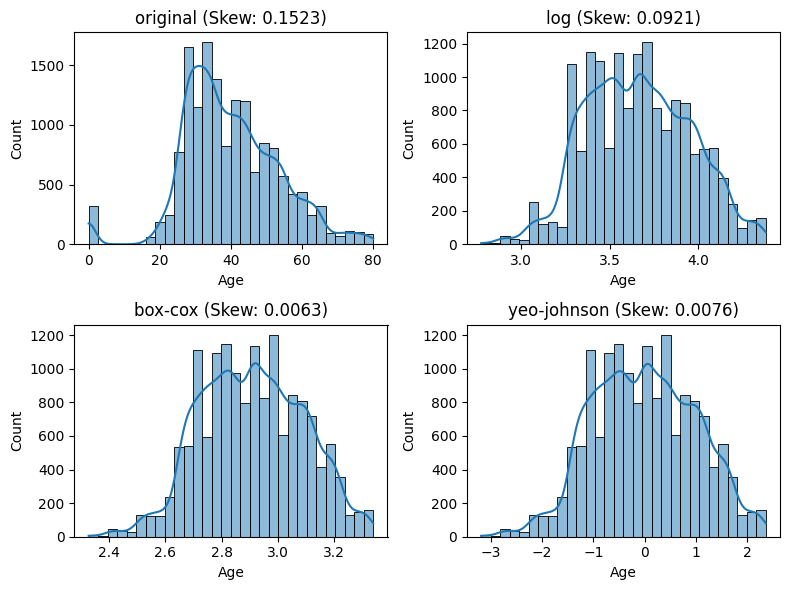

In [11]:
func.plot_post_hist(
    variants=[
        (df['Age'], 'original'),
        (log_trans, 'log'),
        (boxcox_trans, 'box-cox'),
        (yeojohnson, 'yeo-johnson')
    ],
    feature='Age'
)

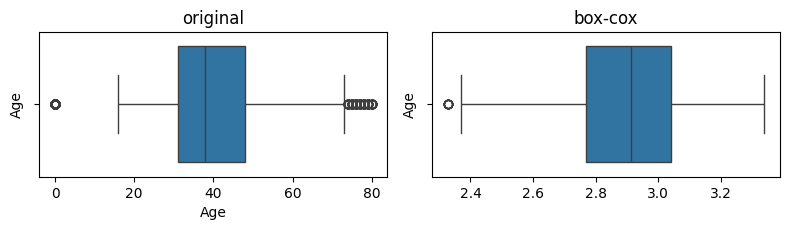

In [10]:
func.plot_post_boxplot(
    variants=[
        (df['Age'], 'original'),
        (boxcox_trans, 'box-cox')
], feature='Age')

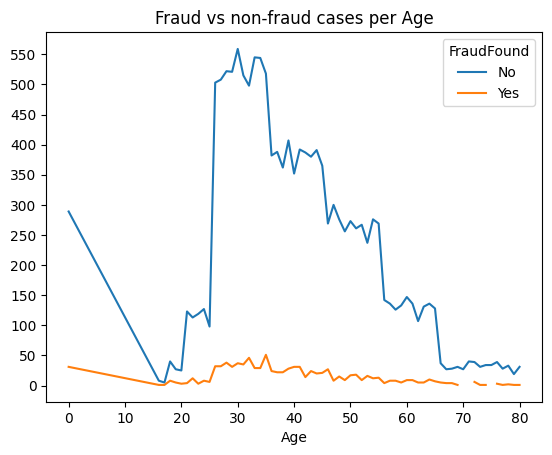

In [12]:
#df.groupby(['Age','FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='line')
df.groupby(['Age','FraudFound']).size().unstack('FraudFound').plot(kind='line')
plt.title('Fraud vs non-fraud cases per Age')
plt.yticks(np.arange(0, 600, 50))
plt.show()

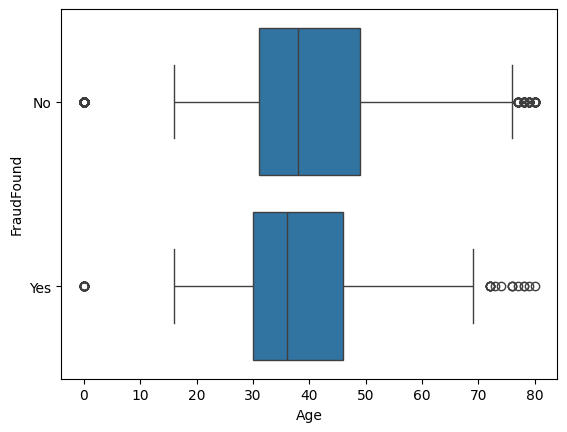

In [13]:
sns.boxplot(data=df, x='Age', y='FraudFound')
plt.show()

Age distribution is a bit right-skewed with a concentration of values toward the younger ages and a long tail toward the older ages.

Need to impute Age = 0 with the mean of the Age column excluding Age = 0, and it might be better to test transformations and decrease skewness before discretisation.

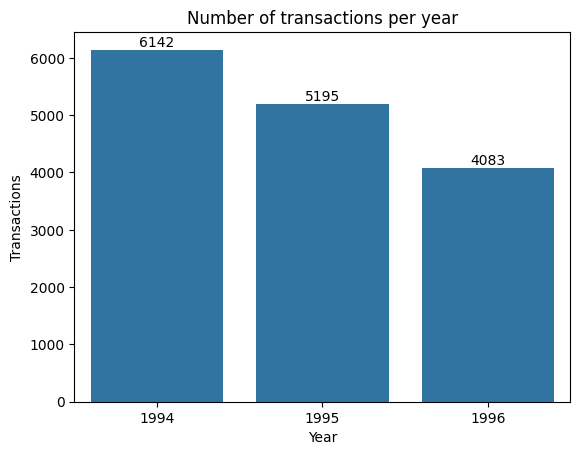

In [20]:
ax = sns.countplot(data=df, x='Year')
ax.bar_label(ax.containers[0])
plt.ylabel('Transactions')
plt.title('Number of transactions per year')
plt.yticks(np.arange(0,7000,1000))
plt.show()

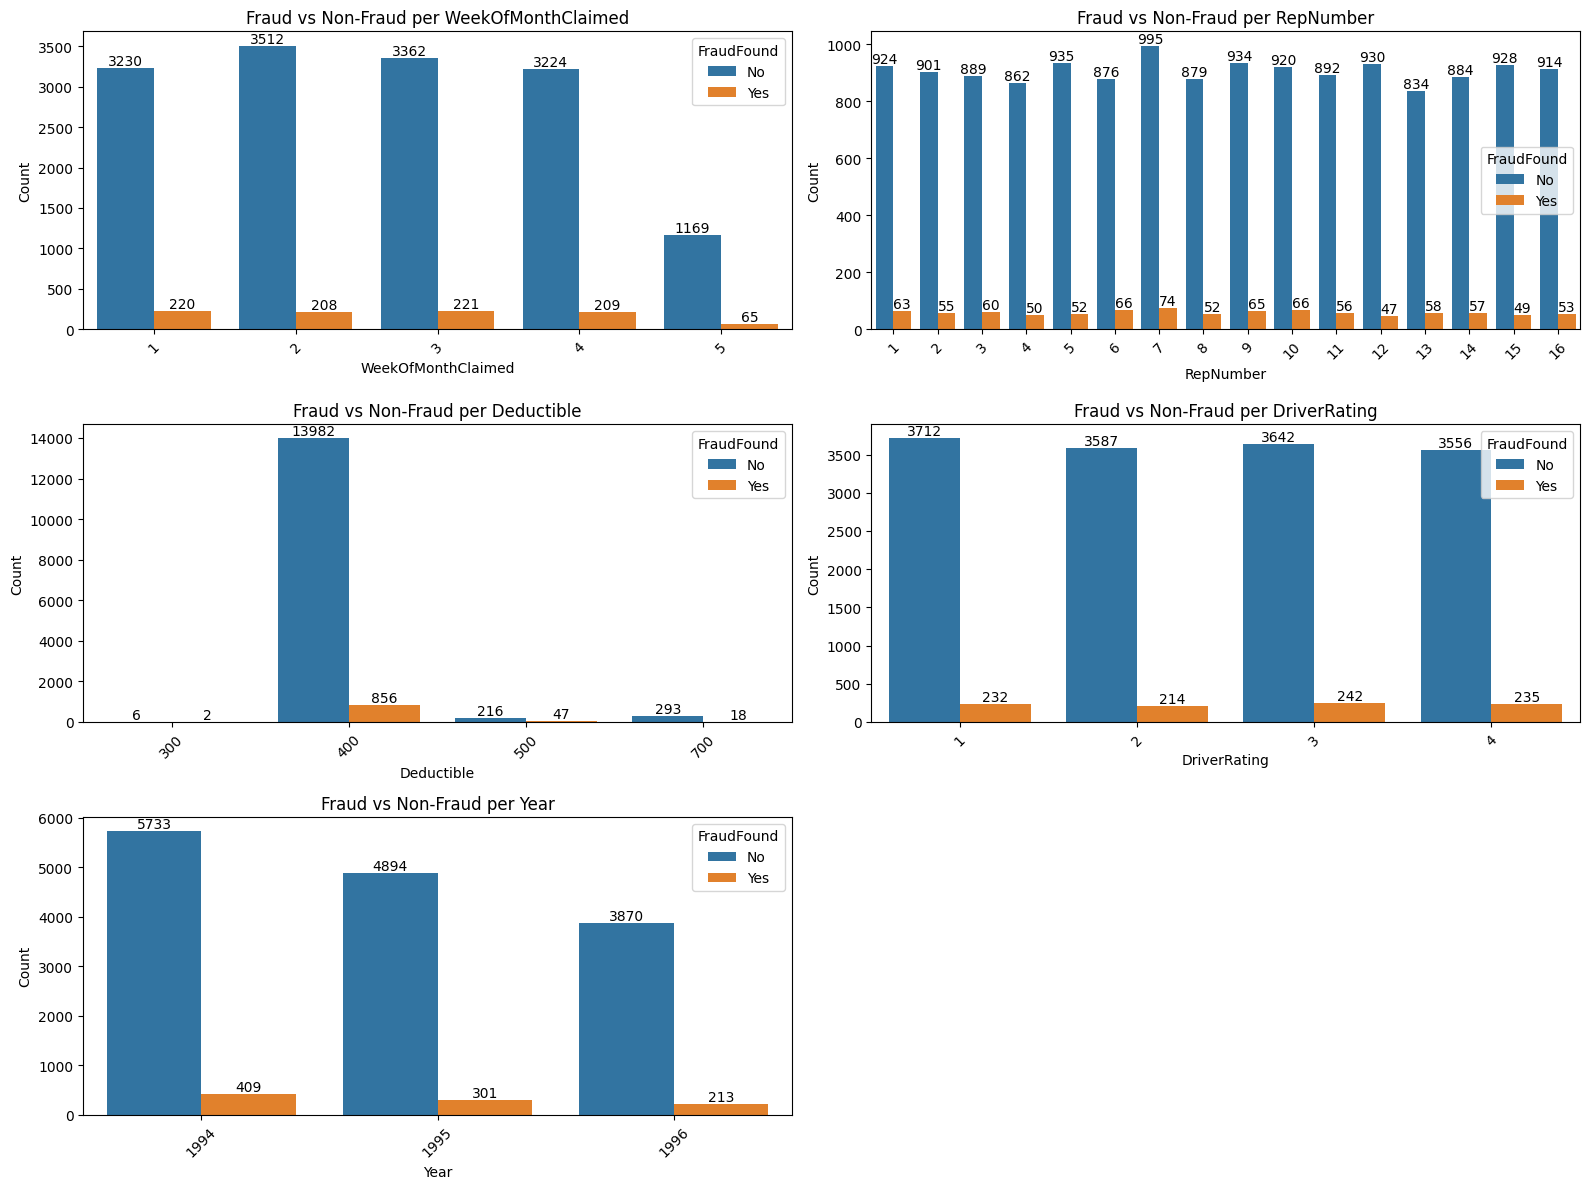

In [17]:
func.multicount_by_target(
    data=df,
    cols=['WeekOfMonthClaimed', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
    hue='FraudFound',
    target_col='FraudFound',
    target_val='Yes',
    figsize=(16, 12)
)

Transactions are decreasing per year for both non-fraud and fraud cases

Most of the fraudulent cases have a deductible of 400. Might need to binarise this as the distribution is too unbalanced, but depending on the model to use and future data, it might be better to leave it as it is or encode it for tree-based models or GBMs (gradient boosting machines).

#### Categorical

In [18]:
cat_var = [var for var in df.columns if var not in num_var and var != 'FraudFound']
print(len(cat_var))
cat_var

24


['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'BasePolicy']

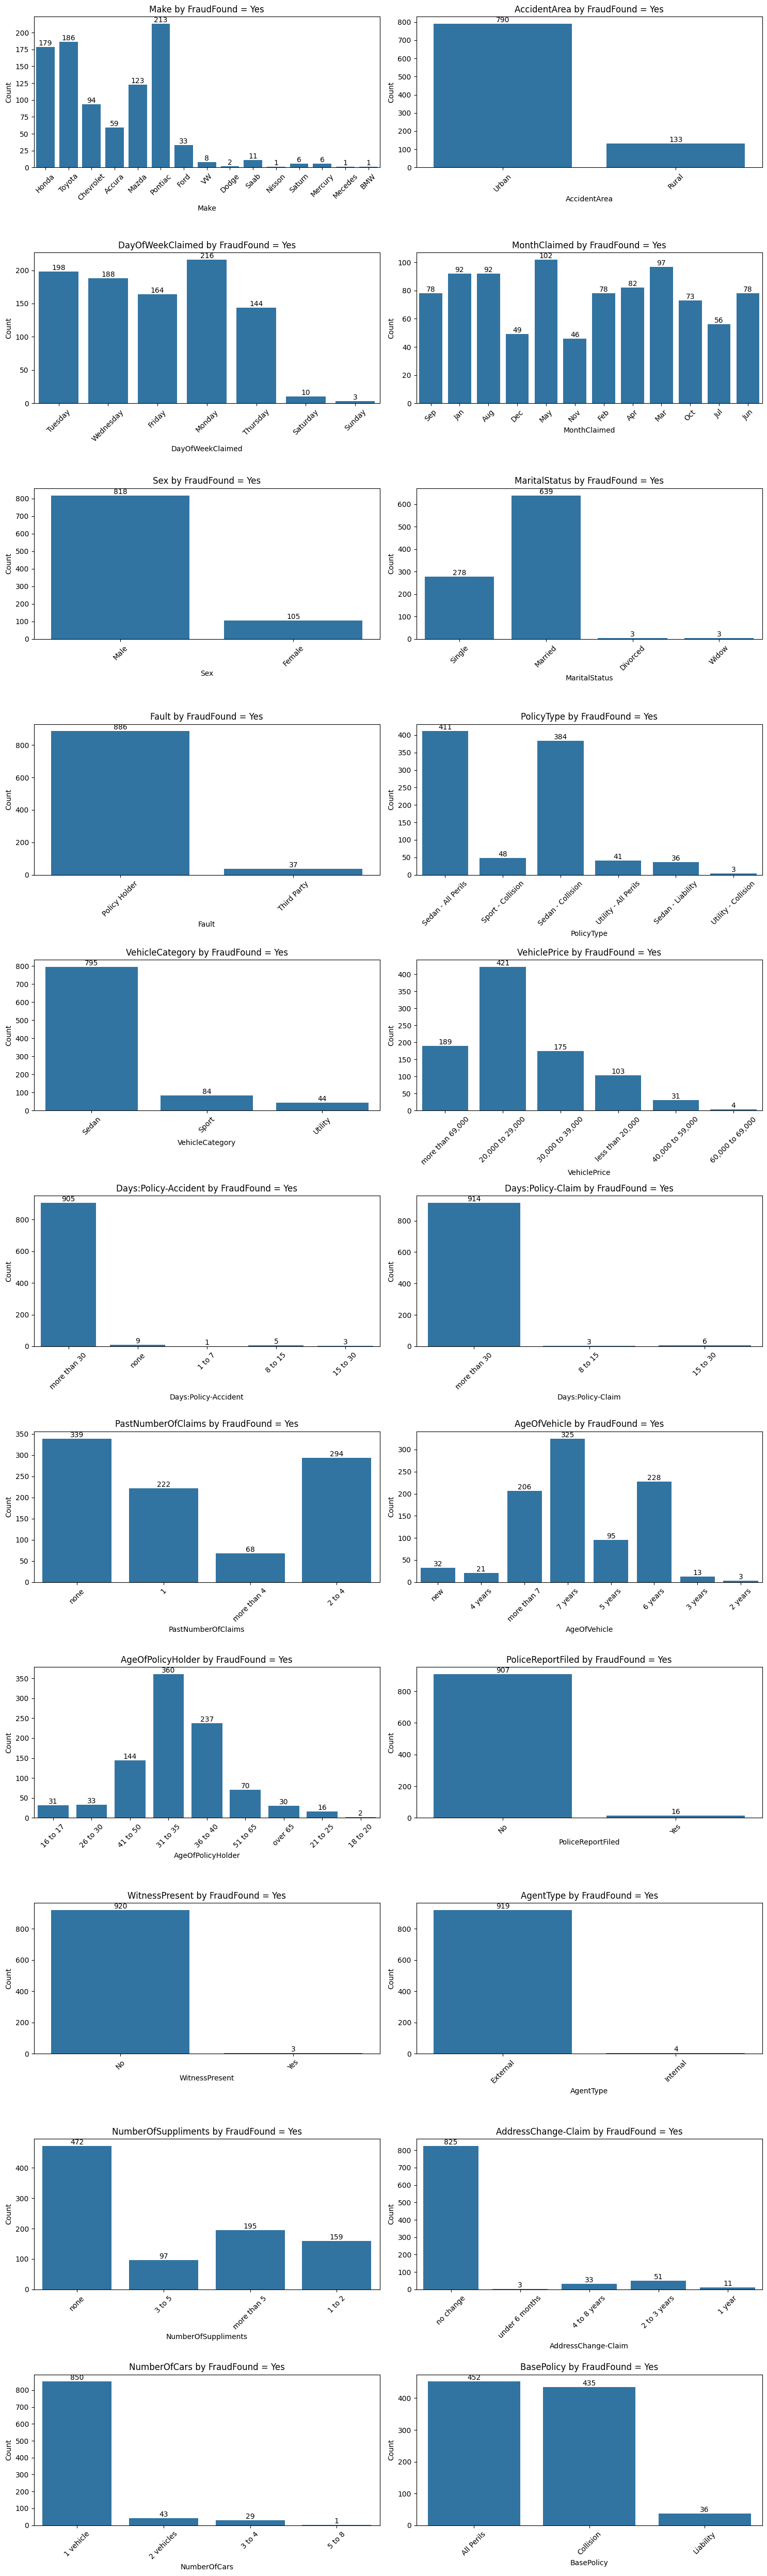

In [32]:
func.multicount_by_target(
    data=df,
    cols=cat_var[2:],
    target_col='FraudFound',
    target_val='Yes',
    figsize=(15,50)
)

Most of the fraud cases recorded are caused by the policy holder of the insurance. 

In [34]:
df_yes = df[(df['FraudFound'] == 'Yes')]
df_yes.groupby(['PoliceReportFiled', 'WitnessPresent', 'AgentType']).size()


PoliceReportFiled  WitnessPresent  AgentType
No                 No              External     901
                                   Internal       4
                   Yes             External       2
Yes                No              External      15
                   Yes             External       1
dtype: int64

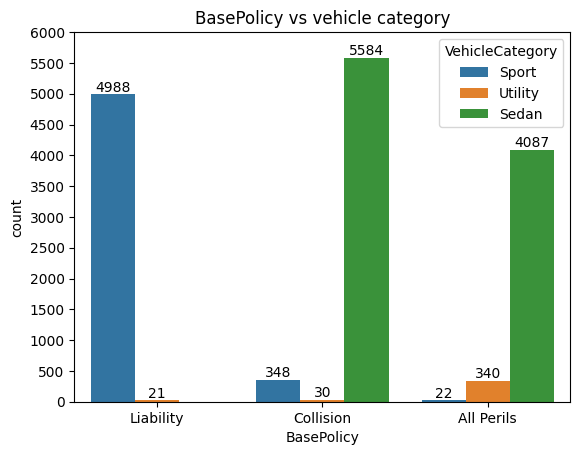

In [36]:
#print(df.groupby(['BasePolicy', 'VehicleCategory']).size().unstack(fill_value=0))
ax = sns.countplot(data=df, x='BasePolicy', hue='VehicleCategory')
for container in ax.containers:
    ax.bar_label(container)
plt.title('BasePolicy vs vehicle category')
plt.yticks(np.arange(0, 6500, 500))
plt.show()

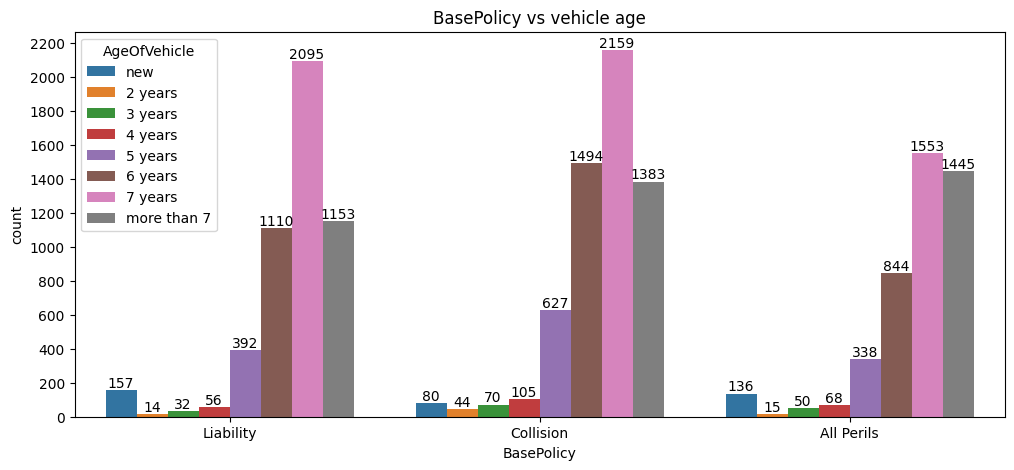

In [39]:
age_vehicle_order = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, x='BasePolicy', hue='AgeOfVehicle', hue_order=age_vehicle_order)
for container in ax.containers:
    ax.bar_label(container)
plt.title('BasePolicy vs vehicle age')
plt.yticks(np.arange(0, 2400, 200))
plt.show()

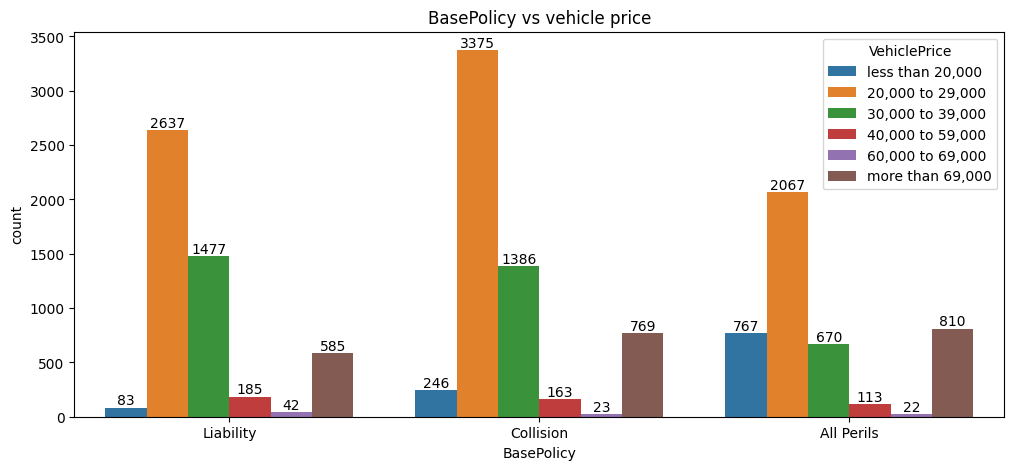

In [38]:
price_order = ['less than 20,000', '20,000 to 29,000', '30,000 to 39,000', '40,000 to 59,000', '60,000 to 69,000', 'more than 69,000']
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, x='BasePolicy', hue='VehiclePrice', hue_order=price_order)
for container in ax.containers:
    ax.bar_label(container)
plt.title('BasePolicy vs vehicle price')
#plt.yticks(np.arange(0, 2400, 200))
plt.show()

In [ ]:
##print(df.groupby(['PolicyType', 'VehiclePrice']).size().unstack(fill_value=0))
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, x='PolicyType', hue='AgeOfVehicle', hue_order=price_order)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Policy types vs vehicle price')
plt.xticks(rotation=90)
plt.show()

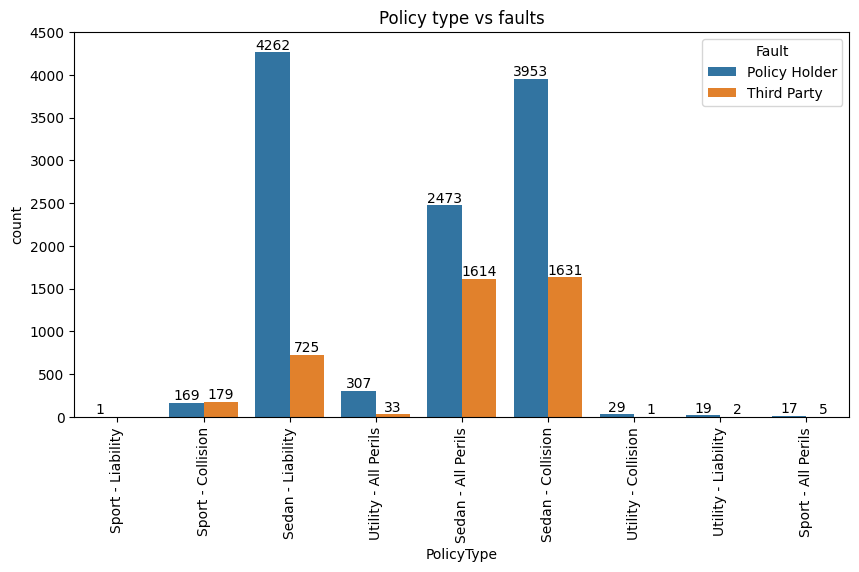

In [43]:
#print(df.groupby(['PolicyType', 'Fault']).size().unstack(fill_value=0))
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='PolicyType', hue='Fault')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Policy type vs faults')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 4600, 500))
plt.show()

### Cardinality

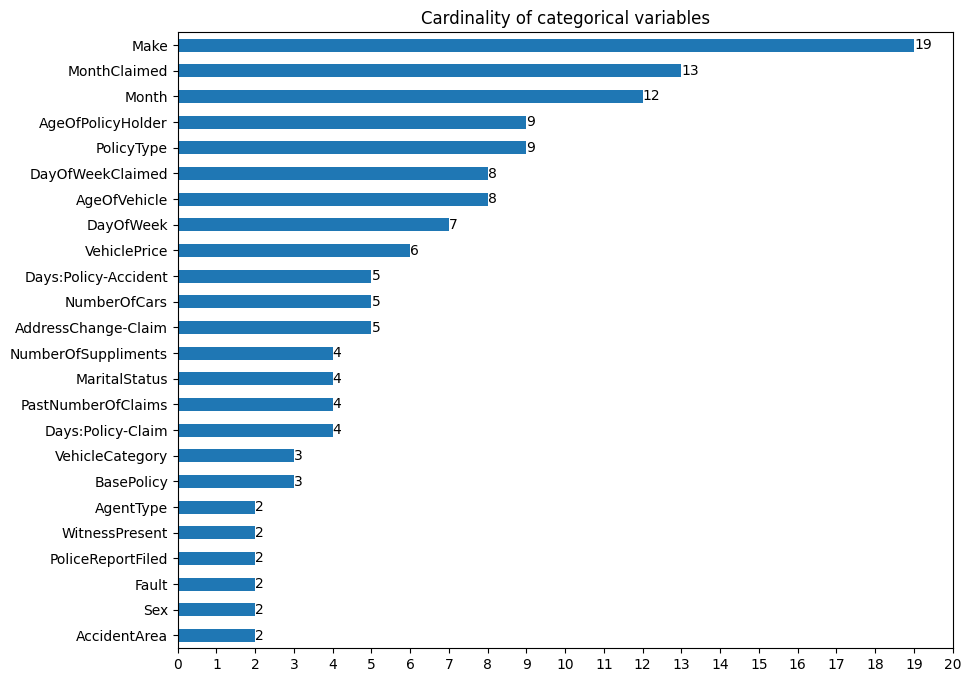

In [48]:
ax = df[cat_var].nunique().sort_values().plot(kind='barh', figsize=(10,8))
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(0, 21, 1))
plt.title('Cardinality of categorical variables')
plt.show()

All categorical variables have low cardinality (<25) and these can be one-hot encoded or ordinal encoded depending on ordinal/nominal